# 数字图像处理实验1

实验要求：
- 利用letter.jpg中的字母和数字，生成一张图片
- 图片中第一行是自己的学号，第2行是自己姓名的拼音（留学生可以是自己名字的英文拼写）
- 要求编程实现，而不是手工处理

思路：

灰度图→二值化→边缘检测→手动标注生成字典
最后按行按字符加入画布


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
img = cv2.imread('letter.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 灰度图
_, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) # 二值化

In [3]:
_, contours, _ = cv2.findContours(
        thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE) # 边缘检测
temp = img.copy()
textcontourslist = []
for c in contours:
    area = cv2.contourArea(c)
    if area>img.shape[0]*img.shape[1]/1000:
        textcontourslist.append(c)
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(temp, (x, y), (x + w, y + h), (36,255,12), 3)

In [4]:
cv2.imwrite("cnt.png",temp)

True

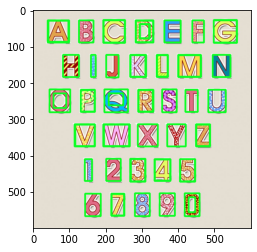

In [5]:
plt.imshow(temp[:,:,::-1])

In [6]:
pkl_file = open('dip1text.pkl', 'rb')
textimagedict = pickle.load(pkl_file)

In [ ]:
textimagedict={}
for c in textcontourslist:
    x,y,w,h = cv2.boundingRect(c)
    cv2.imshow('img',img[y:y+h,x:x+w])
    t = chr(cv2.waitKey(0))
    print(t)
    cv2.destroyAllWindows()
    textimagedict[t]=img[y:y+h,x:x+w] 

In [7]:
textimagedict

{'7': array([[[ 35,  46, 120],
         [ 40,  62, 133],
         [ 30,  65, 128],
         ...,
         [ 20,  65, 139],
         [ 18,  57, 142],
         [  9,  36, 117]],
 
        [[ 83, 105, 183],
         [169, 208, 255],
         [167, 220, 255],
         ...,
         [111, 187, 255],
         [123, 186, 255],
         [ 34,  78, 167]],
 
        [[ 86, 120, 186],
         [181, 233, 255],
         [173, 242, 255],
         ...,
         [101, 212, 255],
         [110, 198, 255],
         [ 28,  84, 161]],
 
        ...,
 
        [[238, 239, 255],
         [106, 117, 167],
         [  0,  27, 107],
         ...,
         [211, 223, 229],
         [211, 223, 229],
         [211, 223, 229]],
 
        [[202, 203, 241],
         [ 39,  48, 111],
         [ 45,  71, 155],
         ...,
         [211, 223, 229],
         [211, 223, 229],
         [211, 223, 229]],
 
        [[145, 144, 194],
         [ 21,  24,  99],
         [ 23,  34, 126],
         ...,
         [211, 223, 229

In [142]:

output =  open("dip1text.pkl",'wb')
pickle.dump(textimagedict, output)

In [8]:
textimagedict['q'].shape

(63, 65, 3)

In [9]:
line1 = 'hello'
line2 = 'world'
line3 = '20210909'
lines = [line1,line2,line3]

In [10]:
dst = np.zeros((300,500,3), np.uint8)
for i in range(0,dst.shape[0]):
    for j in range(0,dst.shape[1]):
        dst[i,j]=[211,223,229]

In [11]:
prows,pcols = 0,0
for line in lines: # 逐行在画布上进行绘制
    for c in line:
        textimg = textimagedict[c]
        rows,cols,_ = textimg.shape
        dst[prows:rows+prows, pcols:cols+pcols ] = textimg
        print(f"rows:{rows},cols{cols},c:{c}")
        cv2.imshow('thresh',dst)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        pcols = pcols+cols  # 画完一个字符向右移位
    pcols = 0
    prows += 70 # 画完一行向下移位

rows:61,cols44,c:h
rows:61,cols45,c:e
rows:59,cols29,c:l
rows:59,cols29,c:l
rows:63,cols57,c:o
rows:59,cols69,c:w
rows:63,cols57,c:o
rows:59,cols39,c:r
rows:59,cols29,c:l
rows:59,cols47,c:d
rows:61,cols40,c:2
rows:63,cols41,c:0
rows:61,cols40,c:2
rows:60,cols20,c:1
rows:63,cols41,c:0
rows:62,cols42,c:9
rows:63,cols41,c:0
rows:62,cols42,c:9


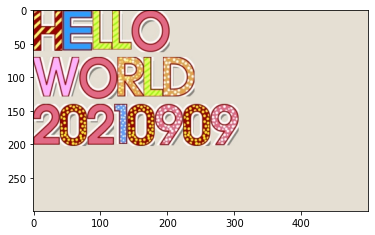

In [12]:
plt.imshow(dst[:,:,::-1])

In [13]:
cv2.imwrite("dip1.png",dst)

True